In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
test = pd.read_csv(r"C:\Users\Zhin\Documents\Coding\Titanic\test.csv")

print(test.shape)

(418, 11)


In [18]:
train = pd.read_csv(r"C:\Users\Zhin\Documents\Coding\Titanic\train.csv")

train_shape = train.shape
print(train_shape)

(891, 12)


In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [21]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [22]:
#here we are looking at passenger class, sex, age and comparing against survival. 
#GAN model will be utilised here to attempt to model a new dataset using class, sex, age and survival.

#Plot graphs for Passenger class, age, sex and survival.

In [23]:
#Number survived in total
train_survived = train["Survived"].value_counts()
print(train_survived)

0    549
1    342
Name: Survived, dtype: int64


Survived    0    1
Sex               
female     81  233
male      468  109


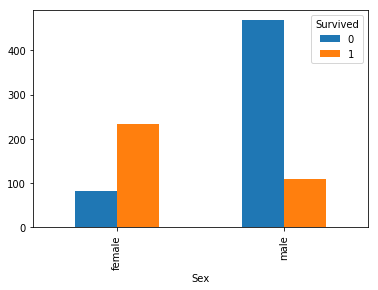

        Survived
Sex             
female  0.742038
male    0.188908


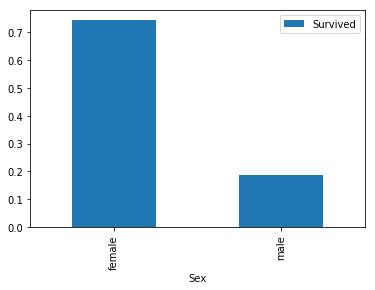

In [24]:
#Sex vs survival

sex_pivot = train.pivot_table(index="Sex",columns="Survived",aggfunc="size")
#table for sex vs number survived
print(sex_pivot)
#bar chart showing sex vs number survived
sex_pivot.plot.bar()
plt.show()

sexrate_pivot = train.pivot_table(index="Sex",values="Survived")
#table for sex vs survival rate
print(sexrate_pivot)
#bar chart showing sex vs survival rate
sexrate_pivot.plot.bar()
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


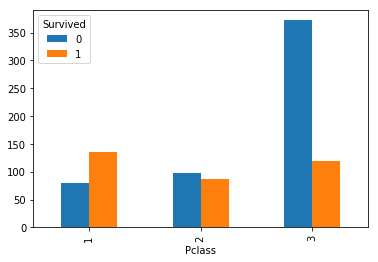

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


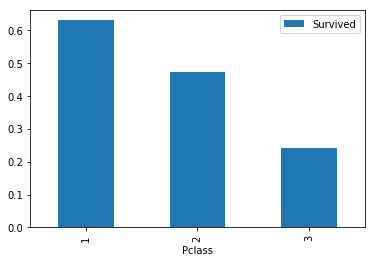

In [25]:
#Passenger class vs survival

pclass_pivot = train.pivot_table(index="Pclass",columns="Survived",aggfunc="size")
#table for pclass vs number survived
print(pclass_pivot)
#bar chart showing sex vs number survived
pclass_pivot.plot.bar()
plt.show()

pclassrate_pivot = train.pivot_table(index="Pclass",values="Survived")
#table for pclass vs survival rate
print(pclassrate_pivot)
#bar chart showing sex vs survival rate
pclassrate_pivot.plot.bar()
plt.show()

In [26]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
#Age missing data Nan, cleaning by replacing NaN with 0, assuming 0=baby
#train["Age"] = train["Age"].fillna(0)
#test["Age"] = test["Age"].fillna(0)

In [28]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
train["Survived"]==1

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22      True
23      True
24     False
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863    False
864    False
865     True
866     True
867    False
868    False
869     True
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

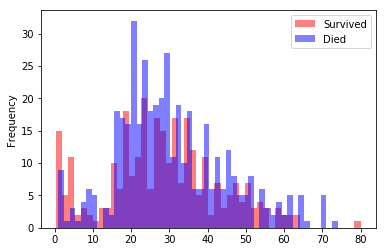

In [30]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

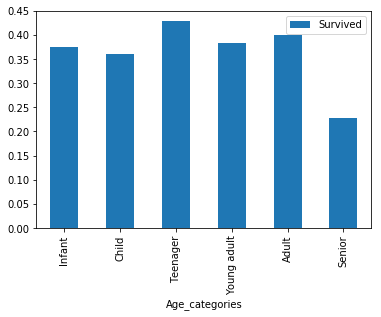

In [34]:
#Categorising age
#using pandas.cut() to make the categories, requiring column to categorise, cut_points and labels

cut_points = [-1,0,5,12,18,35,60,100]
label_name = ["Missing","Infant", "Child", "Teenager", "Young adult", "Adult", "Senior"]

def cat_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(0.5)
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels=label_name)
    return df

train = cat_age(train,cut_points,label_name)
test = cat_age(test,cut_points,label_name)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()